In [12]:
# run stopwatch
from tools import Stopwatch
stopwatch = Stopwatch()
start = stopwatch.start()

### Load libraries, functions, palette, theme

In [13]:
%run _libraries.ipynb

In [14]:
%run _functions.ipynb

In [15]:
dir_save_files = 'files/'

In [16]:
dir_load_files = 'files/'

In [17]:
dir_save_img = 'docs/img/'

In [18]:
session_name = 'research'

# Section IV. Machine Learning

## Load Saved Section if exists

## Load Data

In [19]:
train = loadit('train_preprocessed', dir=dir_load_files)

In [20]:
valid = loadit('valid_preprocessed', dir=dir_load_files)

In [21]:
test = loadit('test_preprocessed', dir=dir_load_files)

## ML-model

In [22]:
features = ['is_Friday', 'is_Sunday', 'is_31', 'target1_previous_month']

In [23]:
target = 'target1'

In [24]:
lgb = LGBMRegressor()

In [25]:
x_train_lgb = train.loc['2017-07-01':, features].copy()

In [26]:
x_train_lgb

,is_Friday,is_Sunday,is_31,target1_previous_month
2017-07-01 00:00:00,0,0,0,38145.69536
2017-07-01 00:10:00,0,0,0,37827.81457
2017-07-01 00:20:00,0,0,0,36200.26490
2017-07-01 00:30:00,0,0,0,34966.88742
2017-07-01 00:40:00,0,0,0,34699.86755
...,...,...,...,...
2017-07-31 23:10:00,0,0,1,40205.56291
2017-07-31 23:20:00,0,0,1,39423.57616
2017-07-31 23:30:00,0,0,1,38883.17881
2017-07-31 23:40:00,0,0,1,38107.54967


In [27]:
y_train_lgb = train.loc['2017-07-01':, 'target1'].values

In [28]:
y_train_lgb

array([36384.31894, 35689.03654, 34751.36213, ..., 41659.53488,
       40843.05648, 39631.09635])

In [29]:
x_valid_lgb = valid[features].copy()

In [30]:
x_valid_lgb

,is_Friday,is_Sunday,is_31,target1_previous_month
2017-08-01 00:00:00,0,0,0,36384.31894
2017-08-01 00:10:00,0,0,0,35689.03654
2017-08-01 00:20:00,0,0,0,34751.36213
2017-08-01 00:30:00,0,0,0,33954.01993
2017-08-01 00:40:00,0,0,0,33411.82724
...,...,...,...,...
2017-08-31 23:10:00,0,0,1,43407.30897
2017-08-31 23:20:00,0,0,1,42507.90698
2017-08-31 23:30:00,0,0,1,41659.53488
2017-08-31 23:40:00,0,0,1,40843.05648


In [31]:
y_valid = valid['target1'].values

In [32]:
y_valid

array([38517.20311, 37973.80688, 37308.94562, ..., 37724.48391,
       36874.22863, 36215.76027])

In [33]:
lgb.fit(X=x_train_lgb, y=y_train_lgb)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001698 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 261
[LightGBM] [Info] Number of data points in the train set: 4464, number of used features: 4
[LightGBM] [Info] Start training from score 35831.553571


LGBMRegressor()

In [34]:
y_pred = lgb.predict(X=x_valid_lgb)

In [35]:
y_pred

array([37448.10833464, 38775.4506826 , 38460.65754144, ...,
       46369.76030533, 44194.77197395, 43919.32760923])

In [36]:
root_mean_squared_error(y_valid, y_pred)

4809.663657555821

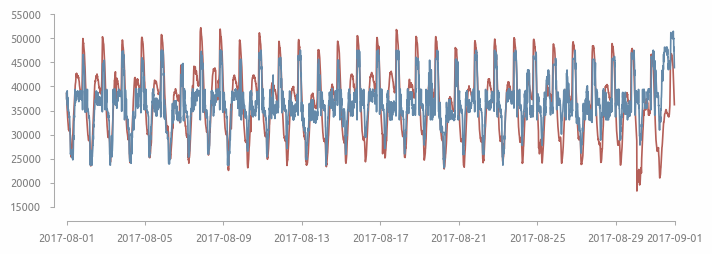

In [37]:
plt.plot(valid.index, y_valid, color=palette[1])
plt.plot(valid.index, y_pred, color=palette[2])
axis_rstyle()

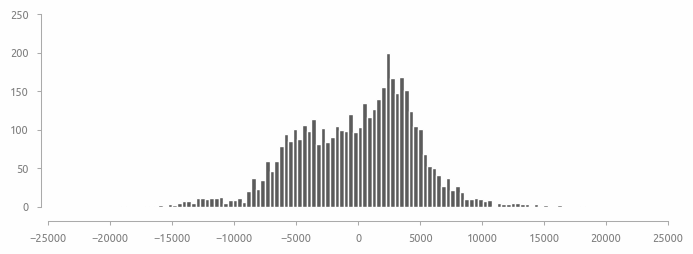

In [38]:
plt.hist(y_valid - y_pred, bins=100);
axis_rstyle()

In [39]:
lgb.feature_importances_

array([ 154,  200,   76, 2570], dtype=int32)

In [40]:
lgb.feature_name_

['is_Friday', 'is_Sunday', 'is_31', 'target1_previous_month']

In [41]:
feature_importances = pd.DataFrame(data=lgb.feature_importances_, columns=['importance'], index=lgb.feature_name_)

In [42]:
feature_importances.sort_values('importance', ascending=False)

,importance
target1_previous_month,2570
is_Sunday,200
is_Friday,154
is_31,76
